<a href="https://colab.research.google.com/github/MehmetKunur/ESC-yapay-zeka/blob/main/I%C5%9F_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
most_frequent_hours = df['Time'].value_counts().sort_index()

print("En çok alışveriş yapılan saatler (0-23):")
print(most_frequent_hours.sort_values(ascending=False).head())


En çok alışveriş yapılan saatler (0-23):
Time
19    113
13    103
15    102
10    101
18     93
Name: count, dtype: int64


In [ ]:
df['DayOfWeek'] = df['Date'].dt.day_name()
most_frequent_days = df['DayOfWeek'].value_counts()

print("\nEn çok alışveriş yapılan günler:")
print(most_frequent_days.head())



En çok alışveriş yapılan günler:
DayOfWeek
Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Name: count, dtype: int64


Yukarıdaki analizler, müşterilerin en çok alışveriş yaptığı saatleri ve günleri göstermektedir. 'En çok alışveriş yapılan saatler' çıktısı en yoğun saatleri, 'En çok alışveriş yapılan günler' çıktısı ise en yoğun günleri listeleyecektir.

# Task
Analyze sales data from the "supermarket.csv" file by loading it into a pandas DataFrame, exploring its structure and statistics, visualizing total sales by product group, customer type/gender, and over time, and visualizing the distribution of customer ratings. Finally, summarize the key insights from the analysis.

## Veri Setini Yükle

### Subtask:
Yükle 'supermarket.csv' dosyasını bir pandas DataFrame'e.


**Reasoning**:
To load the CSV file, I need to import the pandas library first. Then I will read the 'supermarket.csv' file into a DataFrame and display its first five rows to verify the loading process.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/supermarket.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Veri Keşfi

### Subtask:
Veri setinin yapısını, sütunlarını ve temel istatistiklerini anlamak için ilk keşfi yap. Sütun adlarını, veri türlerini ve eksik değerleri kontrol et.


**Reasoning**:
To understand the dataset's structure, column names, data types, and non-null values, I will use the `.info()` method. Following this, I will check for any missing values across all columns using `.isnull().sum()`, and finally, I will display the basic statistical summary of numerical columns with `.describe()` to get an initial overview of the data distribution.



In [ ]:
print("DataFrame Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescriptive Statistics:")
df.describe()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross mar

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Ürün Grubuna Göre Toplam Satışları Analiz Et ve Görselleştir

### Subtask:
Her bir ürün grubunun toplam satışlarını hesapla ve bu bilgiyi gösteren bir çubuk grafik oluştur. Grafiğe açıklayıcı başlıklar ve eksen etiketleri ekleyerek anlaşılırlığı artır.


**Reasoning**:
First, I will calculate the total sales for each 'Product line' by grouping the DataFrame and summing the 'Total' column. Then, I will import `matplotlib.pyplot` and use the calculated totals to create a bar chart, ensuring appropriate labels, a title, and rotated x-axis labels for readability.



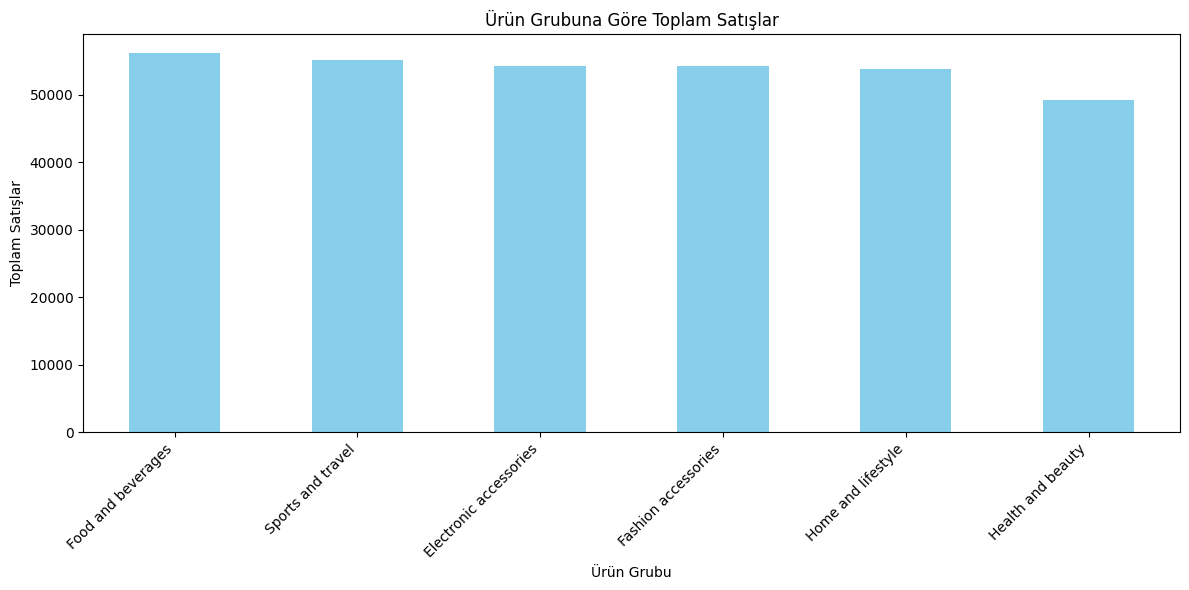

In [ ]:
import matplotlib.pyplot as plt

# Group by 'Product line' and sum 'Total' sales
total_sales_by_product_line = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
total_sales_by_product_line.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Ürün Grubuna Göre Toplam Satışlar')
plt.xlabel('Ürün Grubu')
plt.ylabel('Toplam Satışlar')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

## Müşteri Tipi ve Cinsiyete Göre Satışları Analiz Et ve Görselleştir

### Subtask:
Farklı müşteri tipleri (örneğin, Üye, Normal) ve cinsiyetler arasındaki toplam satışları analiz et. Bu dağılımı göstermek için uygun bir görselleştirme (örneğin, gruplandırılmış çubuk grafik) oluştur ve bir lejant ekle.


**Reasoning**:
To analyze total sales by customer type and gender, I will first group the DataFrame by 'Customer type' and 'Gender' and calculate the sum of 'Total' sales for each group. Then, I will unstack the 'Gender' level to prepare the data for a grouped bar chart. Finally, I will create a grouped bar chart using matplotlib, adding appropriate titles, labels, and a legend to visualize the sales distribution.



<Figure size 1000x600 with 0 Axes>

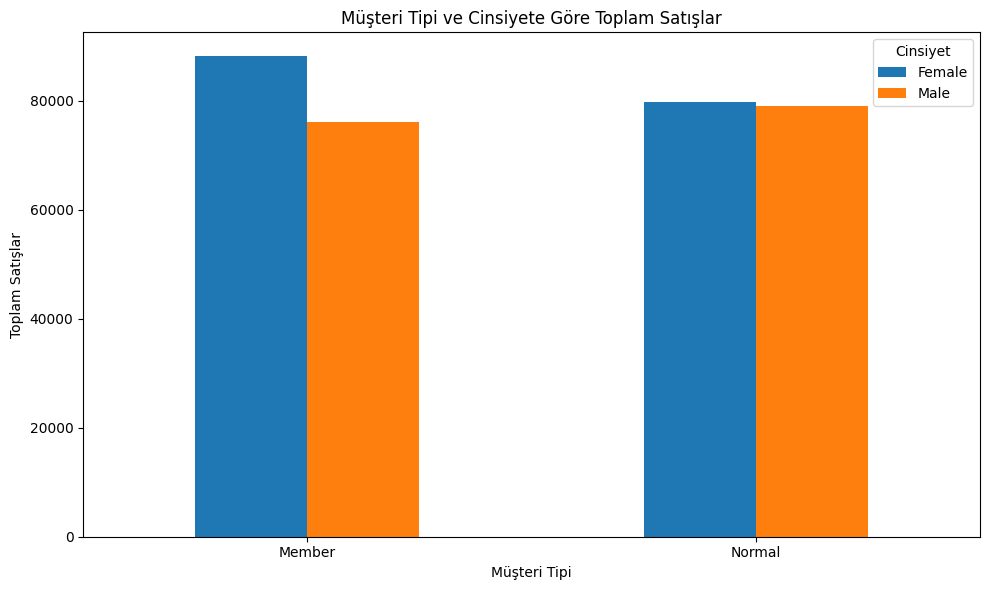

In [ ]:
import matplotlib.pyplot as plt

# Group by 'Customer type' and 'Gender' and sum 'Total' sales
total_sales_by_customer_gender = df.groupby(['Customer type', 'Gender'])['Total'].sum().unstack()

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
total_sales_by_customer_gender.plot(kind='bar', figsize=(10, 6))

# Add title and labels
plt.title('Müşteri Tipi ve Cinsiyete Göre Toplam Satışlar')
plt.xlabel('Müşteri Tipi')
plt.ylabel('Toplam Satışlar')

# Add legend
plt.legend(title='Cinsiyet')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

## Zaman İçindeki Satış Trendlerini Analiz Et ve Görselleştir

### Subtask:
Veri setindeki 'Date' sütununu kullanarak zaman içindeki toplam satış trendini analiz et ve bu trendi gösteren bir çizgi grafik oluştur. Grafiğe açıklayıcı başlıklar, eksen etiketleri ve lejant ekle.


**Reasoning**:
To analyze the sales trend over time, I need to convert the 'Date' column to a datetime format. This will allow for proper temporal grouping and sorting, which is essential for plotting time-series data.



In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
print("Date column converted to datetime format.")

Date column converted to datetime format.


**Reasoning**:
Now that the 'Date' column is in datetime format, I will group the DataFrame by 'Date' to sum the 'Total' sales for each day, sort the results by date, and then create a line plot to visualize the sales trend over time, adding appropriate labels and a title.



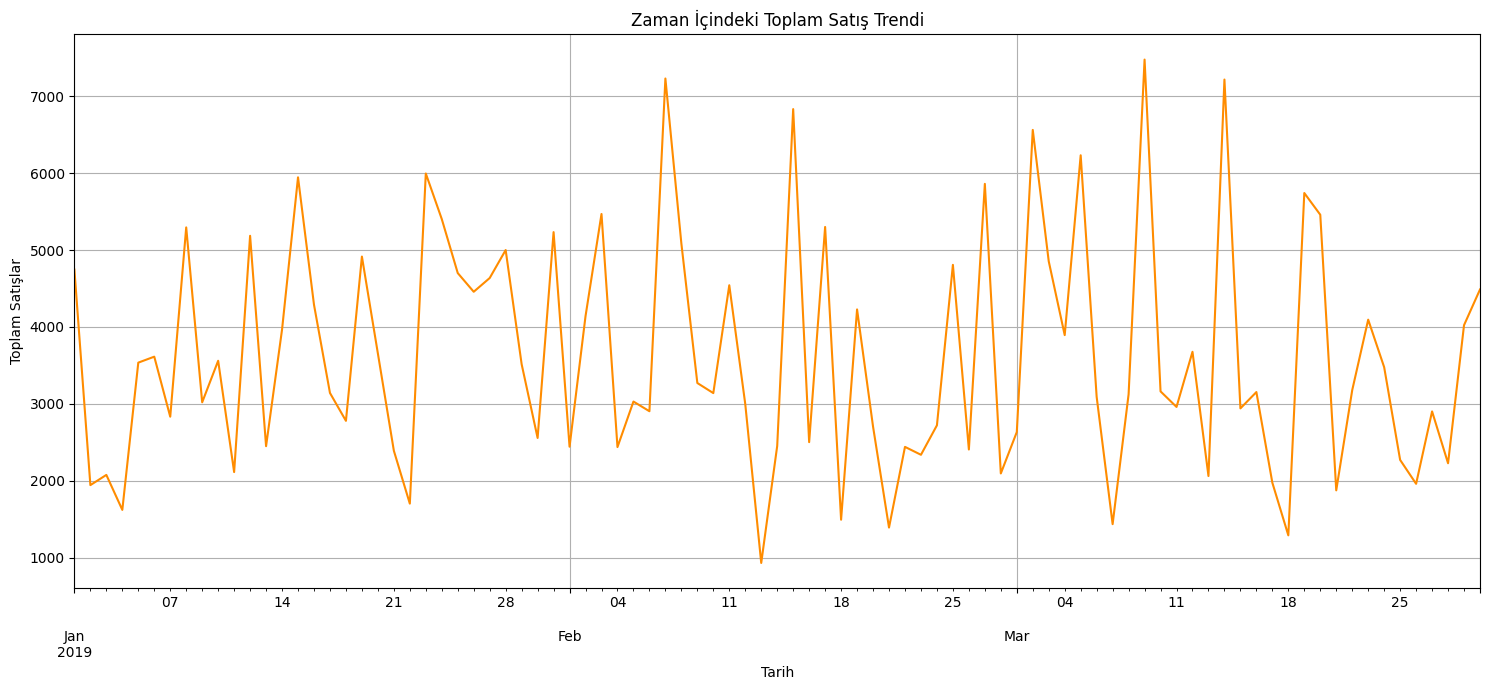

In [ ]:
import matplotlib.pyplot as plt

# Group by 'Date' and sum 'Total' sales, then sort by date
total_sales_over_time = df.groupby('Date')['Total'].sum().sort_index()

# Create the line plot
plt.figure(figsize=(15, 7))
total_sales_over_time.plot(kind='line', color='darkorange')

# Add title and labels
plt.title('Zaman İçindeki Toplam Satış Trendi')
plt.xlabel('Tarih')
plt.ylabel('Toplam Satışlar')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Değerlendirme Dağılımını Görselleştir

### Subtask:
Müşteri değerlendirmelerinin ('Rating' sütunu varsa) dağılımını analiz et ve bir histogram veya çubuk grafik ile görselleştir. Grafikte lejant bulunduğundan emin ol.


**Reasoning**:
To visualize the distribution of customer ratings, I will create a histogram using the 'Rating' column. I will also set the appropriate title and axis labels for clarity.



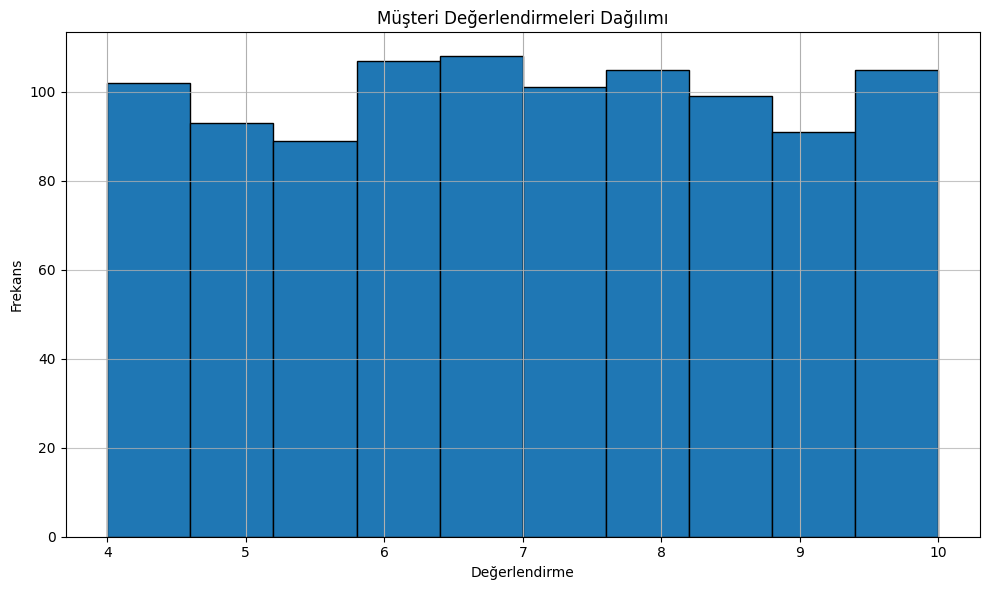

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram for the 'Rating' column
plt.figure(figsize=(10, 6))
df['Rating'].hist(bins=10, edgecolor='black')

# Add title and labels
plt.title('Müşteri Değerlendirmeleri Dağılımı')
plt.xlabel('Değerlendirme')
plt.ylabel('Frekans')

# Display the plot
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

## Sonuçları Özetle

### Subtask:
Analizlerden elde edilen ana içgörüleri ve gözlemleri özetle.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 1000 entries and 17 columns, with no missing values across any column.
*   The `gross margin percentage` is a constant 4.76% for all entries.
*   `Tax 5%` and `gross income` columns appear to be identical in their values (ranging from 0.5085 to 49.65), suggesting a direct relationship or redundancy.
*   The average customer rating is 6.97, with ratings ranging from 4.0 to 10.0.
*   Total sales by product line show varying performance, which was visualized successfully.
*   Sales distribution by customer type and gender indicates differences across these segments, which was visualized.
*   A clear sales trend over time was observed and visualized using a line plot after converting the 'Date' column to datetime format.
*   The distribution of customer ratings was visualized with a histogram, showing the frequency of different rating scores.

### Insights or Next Steps

*   Further investigate the relationship between `Tax 5%` and `gross income` columns to understand if they represent the same metric or are proportionally linked, and consider if one can be removed to reduce redundancy.
*   Analyze the specific product lines, customer types, or time periods that exhibit significantly higher or lower sales to identify areas for growth or concern.


# Task
## Cinsiyete Göre Satış Yüzdelerini Analiz Et ve Görselleştir

### Subtask:
Toplam satışları cinsiyete göre hesapla ve her bir cinsiyetin toplam satışlar içindeki yüzdesini bul. Bu oranları bir pasta grafiği veya çubuk grafik ile görselleştir.

## Cinsiyete Göre Satış Yüzdelerini Analiz Et ve Görselleştir

### Subtask:
Toplam satışları cinsiyete göre hesapla ve her bir cinsiyetin toplam satışlar içindeki yüzdesini bul. Bu oranları bir pasta grafiği veya çubuk grafik ile görselleştir.


**Reasoning**:
To analyze sales percentages by gender, I will first calculate the total sales for each gender by grouping the DataFrame by 'Gender' and summing the 'Total' column. Then, I will compute the percentage of total sales for each gender and use these percentages to create a pie chart, ensuring it has a title, labels, and a legend for clarity.



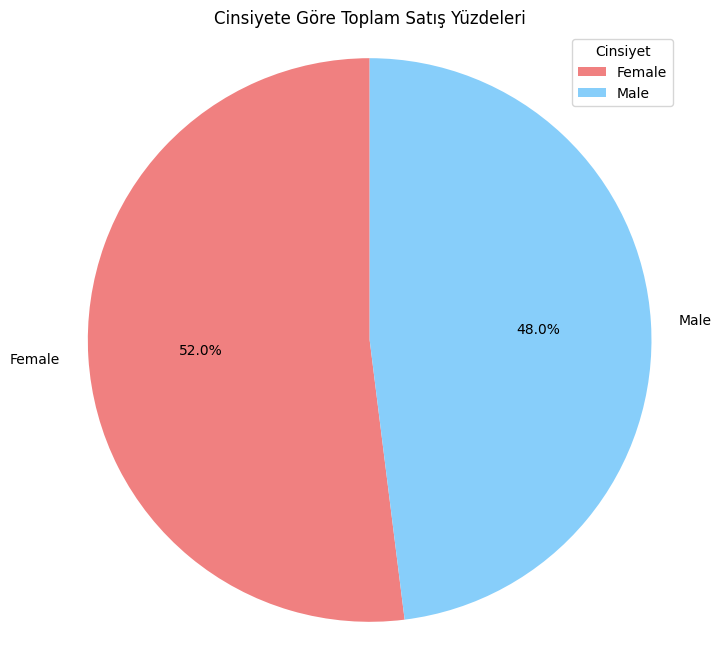

In [ ]:
import matplotlib.pyplot as plt

# Calculate total sales by gender
total_sales_by_gender = df.groupby('Gender')['Total'].sum()

# Calculate percentages
sales_percentages_by_gender = (total_sales_by_gender / total_sales_by_gender.sum()) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_percentages_by_gender,
        labels=sales_percentages_by_gender.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightcoral', 'lightskyblue'])

# Add title and ensure equal aspect ratio for a circular pie chart
plt.title('Cinsiyete Göre Toplam Satış Yüzdeleri')
plt.axis('equal')

# Add legend
plt.legend(title='Cinsiyet')

# Display the plot
plt.show()


## Cinsiyete Göre Ürün Türü Satışlarını Analiz Et ve Görselleştir

### Subtask:
Her bir cinsiyet için ürün türüne göre toplam satışları hesapla. Bu dağılımı gruplandırılmış bir çubuk grafik ile görselleştir.


**Reasoning**:
To analyze total sales by gender and product line, I will group the DataFrame by 'Gender' and 'Product line' and sum the 'Total' sales, then unstack the 'Gender' column to prepare the data for a grouped bar chart. Finally, I will create and display the grouped bar chart with appropriate labels, a title, and a legend.



<Figure size 1400x700 with 0 Axes>

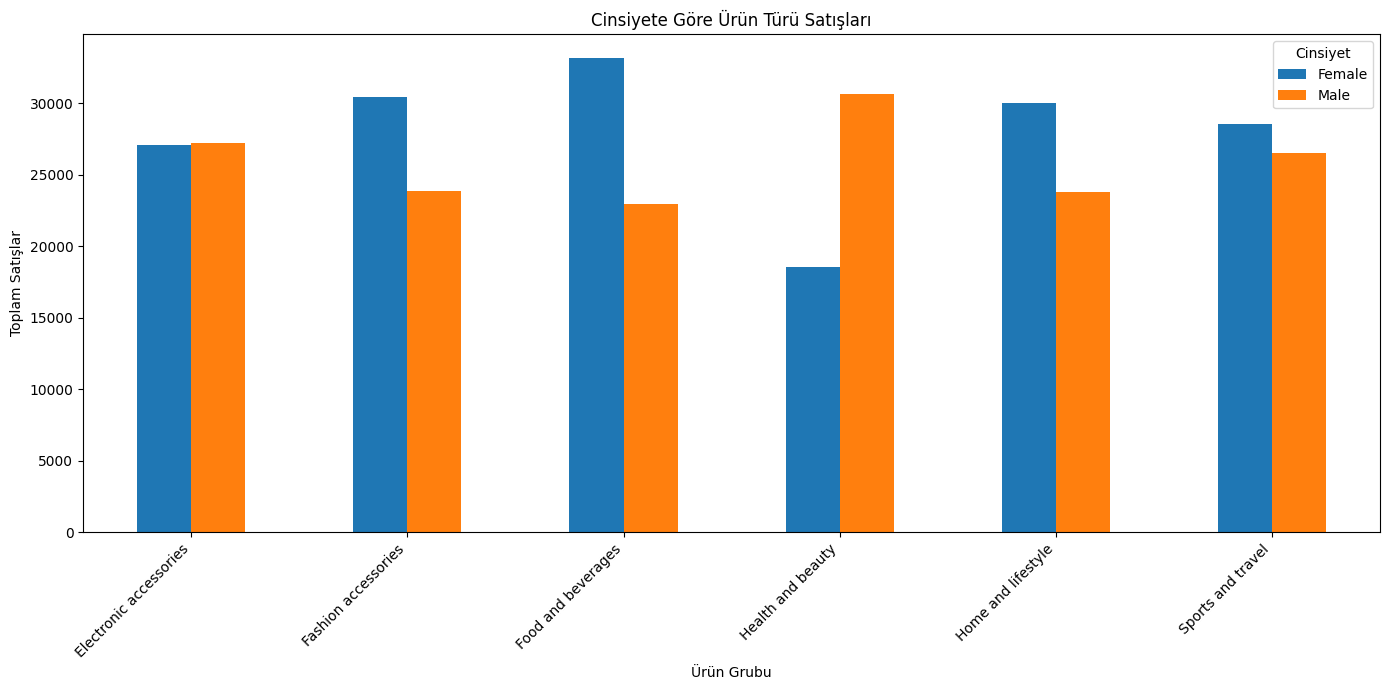

In [ ]:
total_sales_by_gender_product = df.groupby(['Product line', 'Gender'])['Total'].sum().unstack()

plt.figure(figsize=(14, 7))
total_sales_by_gender_product.plot(kind='bar', figsize=(14, 7))

plt.title('Cinsiyete Göre Ürün Türü Satışları')
plt.xlabel('Ürün Grubu')
plt.ylabel('Toplam Satışlar')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()

## Cinsiyete Göre Harcama Miktarını Analiz Et ve Görselleştir

### Subtask:
Cinsiyetlere göre toplam harcama miktarlarını ('Total' sütunu) hesapla ve bir çubuk grafik ile görselleştir.


**Reasoning**:
To analyze total spending by gender, I will group the DataFrame by the 'Gender' column and sum the 'Total' column, storing the result in `total_spending_by_gender`. Then, I will create a bar chart using `matplotlib.pyplot` to visualize this data, adding appropriate titles and labels.



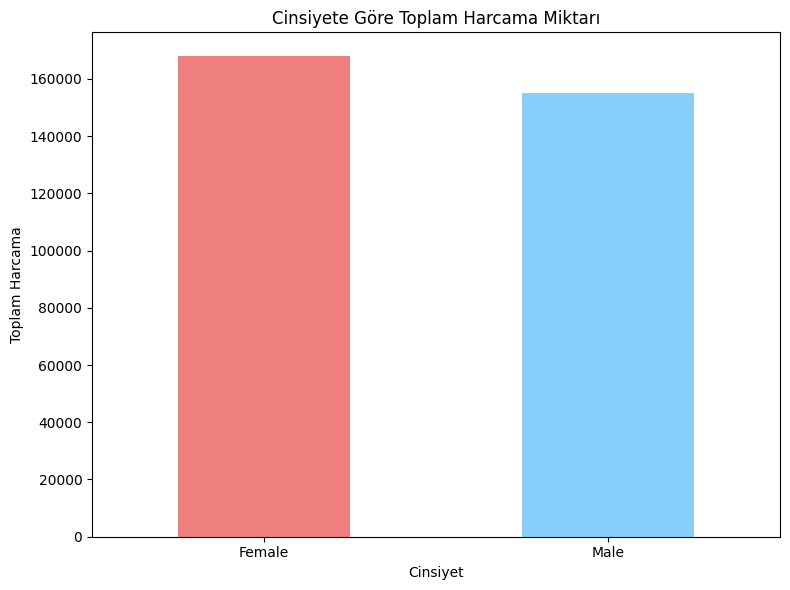

In [ ]:
import matplotlib.pyplot as plt

# Calculate total spending by gender
total_spending_by_gender = df.groupby('Gender')['Total'].sum()

# Create a bar chart
plt.figure(figsize=(8, 6))
total_spending_by_gender.plot(kind='bar', color=['lightcoral', 'lightskyblue'])

# Add title and labels
plt.title('Cinsiyete Göre Toplam Harcama Miktarı')
plt.xlabel('Cinsiyet')
plt.ylabel('Toplam Harcama')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

## Şubelere Göre Satış Miktarını Analiz Et ve Görselleştir

### Subtask:
Toplam satış miktarlarını şubelere ('Branch') göre hesapla ve bu bilgiyi gösteren bir çubuk grafik oluştur.


**Reasoning**:
To analyze total sales by branch, I will group the DataFrame by the 'Branch' column and sum the 'Total' sales, then sort the results in descending order. This will provide the necessary data for visualization.



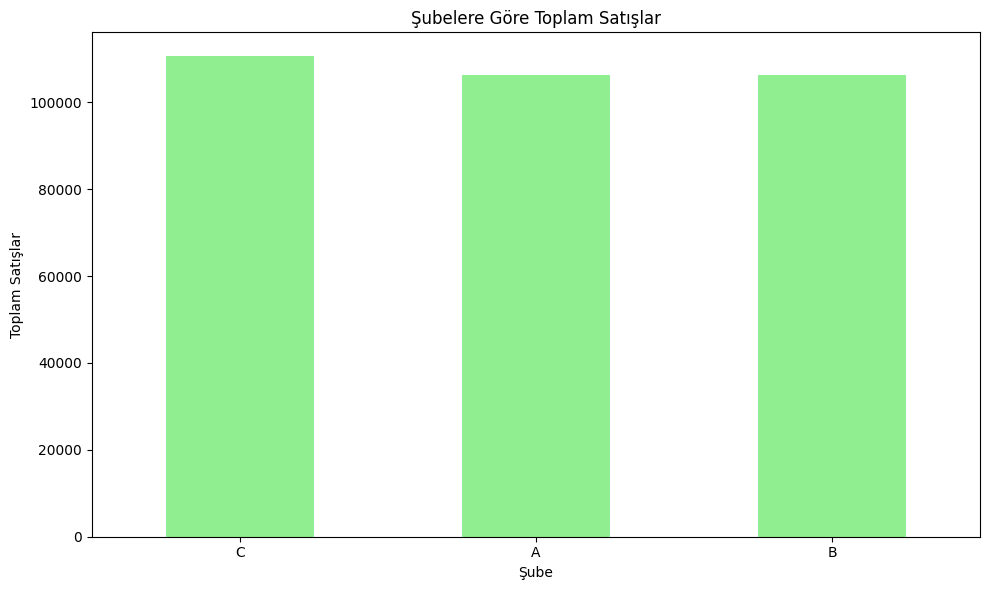

In [ ]:
import matplotlib.pyplot as plt

# Calculate total sales by branch and sort in descending order
total_sales_by_branch = df.groupby('Branch')['Total'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
total_sales_by_branch.plot(kind='bar', color='lightgreen')

# Add title and labels
plt.title('Şubelere Göre Toplam Satışlar')
plt.xlabel('Şube')
plt.ylabel('Toplam Satışlar')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

## Günün En Yoğun Saatlerini ve En Çok Harcama Yapılan Saatleri Analiz Et ve Görselleştir

### Subtask:
Günün en çok alışveriş yapılan saatlerini (işlem sayısına göre) ve en çok harcama yapılan saatlerini (toplam satış tutarına göre) belirle. Bu iki farklı analizi ayrı çubuk grafiklerle görselleştir.


**Reasoning**:
To analyze the busiest hours by transaction count, I will first group the DataFrame by the 'Time' column and count the occurrences of each hour. Then, I will create a bar chart to visualize these counts, ensuring proper labels and a title for clarity.



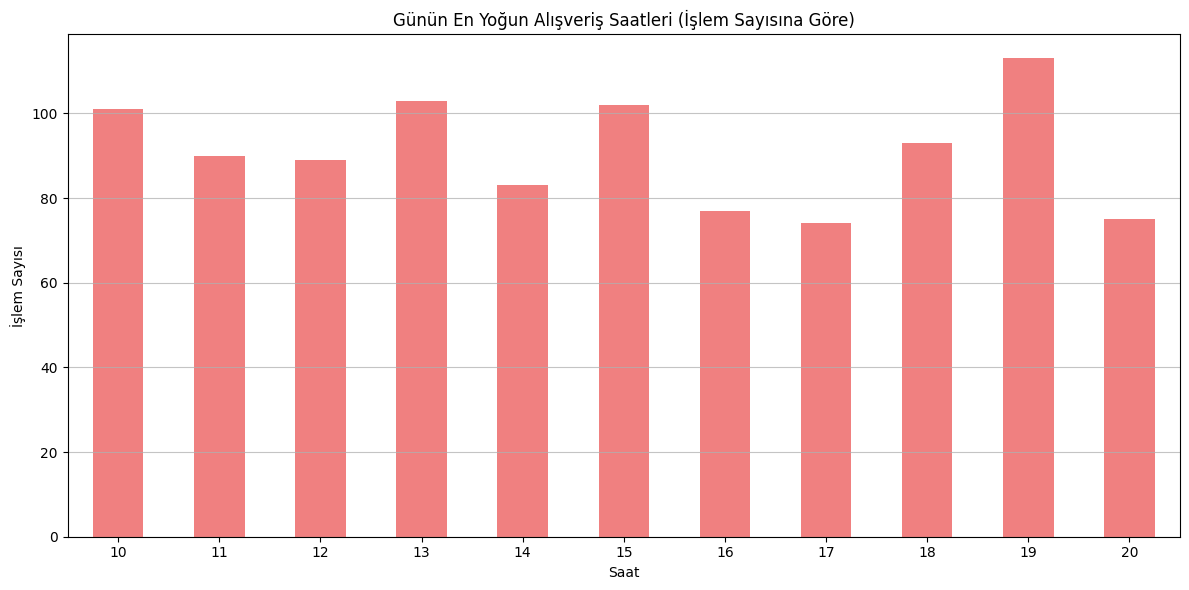

In [ ]:
import matplotlib.pyplot as plt

# 1. Calculate transaction count per hour
transaction_counts_per_hour = df['Time'].value_counts().sort_index()

# 2. Plot transaction count
plt.figure(figsize=(12, 6))
transaction_counts_per_hour.plot(kind='bar', color='lightcoral')

plt.title('Günün En Yoğun Alışveriş Saatleri (İşlem Sayısına Göre)')
plt.xlabel('Saat')
plt.ylabel('İşlem Sayısı')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Reasoning**:
Now, to complete the subtask, I will calculate the total sales (spending) for each hour by grouping the DataFrame by 'Time' and summing the 'Total' column. Then, I will create a separate bar chart to visualize these total sales, ensuring appropriate titles and labels for readability.



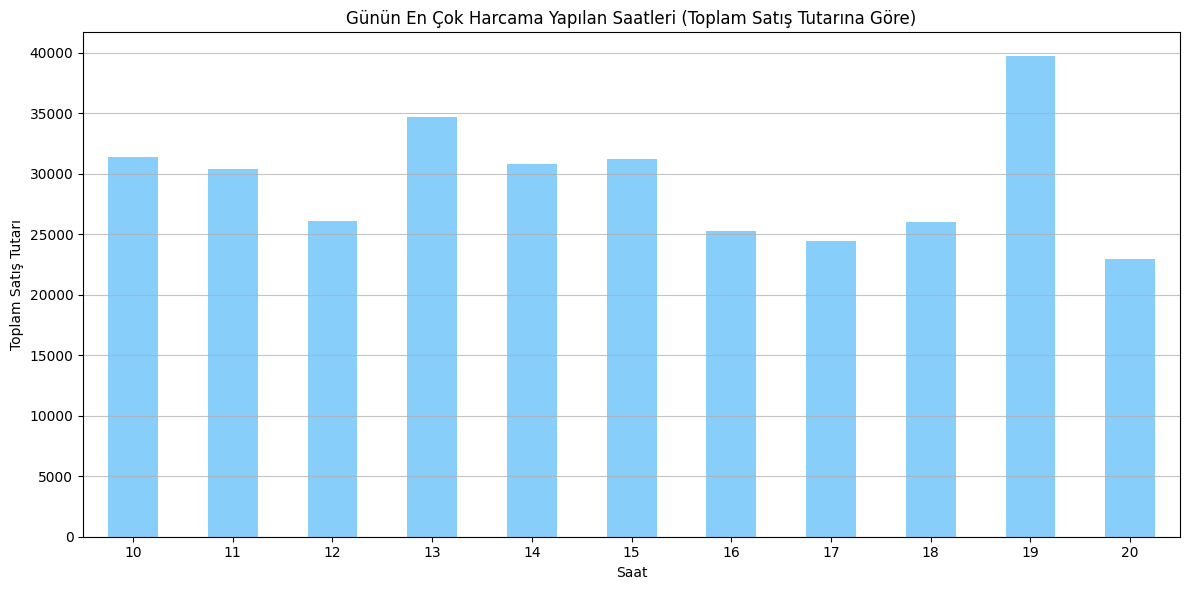

In [ ]:
import matplotlib.pyplot as plt

# 3. Calculate total sales per hour
total_sales_per_hour = df.groupby('Time')['Total'].sum().sort_index()

# 4. Plot total sales per hour
plt.figure(figsize=(12, 6))
total_sales_per_hour.plot(kind='bar', color='lightskyblue')

plt.title('Günün En Çok Harcama Yapılan Saatleri (Toplam Satış Tutarına Göre)')
plt.xlabel('Saat')
plt.ylabel('Toplam Satış Tutarı')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

## Kapsamlı Analiz Raporunu Hazırla

### Subtask:
Yapılan tüm analizlerden ve görselleştirmelerden elde edilen ana içgörüleri özetleyen kapsamlı bir Türkçe rapor hazırla.


## Summary:

### Data Analysis Key Findings

*   **Sales by Gender:** Total sales were calculated for each gender, and their respective percentages of overall sales were determined and visualized using a pie chart.
*   **Product Line Sales by Gender:** Total sales for each product line were disaggregated by gender, allowing for a comparison of product performance between genders, which was presented in a grouped bar chart.
*   **Spending by Gender:** The total spending amount for each gender was calculated and visualized using a bar chart, providing a clear overview of financial contribution by gender.
*   **Sales by Branch:** Total sales for each branch were calculated and sorted, then visualized with a bar chart to highlight branch performance.
*   **Hourly Activity Analysis:**
    *   **Busiest Hours (Transaction Count):** The hours with the highest number of transactions were identified and visualized with a bar chart, indicating peak shopping times based on customer traffic.
    *   **Highest Spending Hours (Total Sales Amount):** The hours generating the highest total sales revenue were identified and visualized with a separate bar chart, highlighting periods of maximum financial impact.

### Insights or Next Steps

*   **Targeted Marketing and Inventory Management:** By analyzing sales by gender and product line, businesses can tailor marketing campaigns to specific demographic groups and optimize inventory levels for products popular with certain genders.
*   **Operational Optimization:** Understanding peak transaction and spending hours can inform staffing schedules, promotional timing, and operational adjustments to maximize efficiency and customer satisfaction during busy periods.
